## Create Latitude and Longitude Combinations

In [1]:
#Import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import citipy
from citipy import citipy

#Import requests library
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 


In [3]:
# Create a set of random lattitude and longitude  combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

591

In [7]:
# Create an empty list to hold the weather data.
city_data = []
record_count=0
set_count=0
# Print the beginning of the logging. 
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through all the cities in our list. 
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # CReate endpoint URL with each city. 
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count}| {city}")
    
    #Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        
        #Parse the Json and retrieve data. 
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data. 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list. 
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind, 
                         "Country": city_country,
                         "Date": city_date})
    #If an error is experienced, skip city.
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate that data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 0| kruisfontein
Processing Record 1 of Set 0| butembo
Processing Record 2 of Set 0| albany
Processing Record 3 of Set 0| bambous virieux
Processing Record 4 of Set 0| rikitea
Processing Record 5 of Set 0| bac
Processing Record 6 of Set 0| at-bashi
Processing Record 7 of Set 0| arraial do cabo
Processing Record 8 of Set 0| coari
Processing Record 9 of Set 0| sitka
Processing Record 10 of Set 0| nanyuki
Processing Record 11 of Set 0| norman wells
Processing Record 12 of Set 0| puerto ayora
Processing Record 13 of Set 0| kodiak
Processing Record 14 of Set 0| mayo
Processing Record 15 of Set 0| busselton
Processing Record 16 of Set 0| kashi
Processing Record 17 of Set 0| ushuaia
Processing Record 18 of Set 0| korla
Processing Record 19 of Set 0| barrow
Processing Record 20 of Set 0| lamak
Processing Record 21 of Set 0| avera
Processing Record 22 of Set 0| ponta do sol
Processing Record 23 of Set 0| new n

Processing Record 47 of Set 3| zunheboto
Processing Record 48 of Set 3| berdigestyakh
Processing Record 49 of Set 3| chicama
Processing Record 50 of Set 3| la primavera
Processing Record 1 of Set 4| caravelas
Processing Record 2 of Set 4| takefu
Processing Record 3 of Set 4| roebourne
Processing Record 4 of Set 4| kropotkin
Processing Record 5 of Set 4| yanji
Processing Record 6 of Set 4| fastiv
Processing Record 7 of Set 4| ankang
Processing Record 8 of Set 4| tabas
Processing Record 9 of Set 4| lata
Processing Record 10 of Set 4| mizpe ramon
City not found. Skipping...
Processing Record 11 of Set 4| chadiza
Processing Record 12 of Set 4| san andres
Processing Record 13 of Set 4| pangnirtung
Processing Record 14 of Set 4| port alfred
Processing Record 15 of Set 4| ambilobe
Processing Record 16 of Set 4| tiksi
Processing Record 17 of Set 4| trinidad
Processing Record 18 of Set 4| sataua
City not found. Skipping...
Processing Record 19 of Set 4| port victoria
Processing Record 20 of Set

Processing Record 37 of Set 7| port moresby
Processing Record 38 of Set 7| beringovskiy
Processing Record 39 of Set 7| guarapari
Processing Record 40 of Set 7| vao
Processing Record 41 of Set 7| airai
Processing Record 42 of Set 7| the pas
Processing Record 43 of Set 7| oistins
Processing Record 44 of Set 7| libertador general san martin
Processing Record 45 of Set 7| gurupa
Processing Record 46 of Set 7| solnechnyy
Processing Record 47 of Set 7| winterberg
Processing Record 48 of Set 7| talcahuano
Processing Record 49 of Set 7| bequimao
Processing Record 50 of Set 7| sikandra
Processing Record 1 of Set 8| huatulco
Processing Record 2 of Set 8| byron bay
Processing Record 3 of Set 8| akyab
Processing Record 4 of Set 8| berlevag
Processing Record 5 of Set 8| turayf
Processing Record 6 of Set 8| imeni babushkina
Processing Record 7 of Set 8| simao
Processing Record 8 of Set 8| moron
Processing Record 9 of Set 8| laibin
Processing Record 10 of Set 8| kondoa
Processing Record 11 of Set 8| 

Processing Record 25 of Set 11| dingle
Processing Record 26 of Set 11| kholtoson
Processing Record 27 of Set 11| kathu
Processing Record 28 of Set 11| muravlenko
Processing Record 29 of Set 11| neiafu
Processing Record 30 of Set 11| butia
Processing Record 31 of Set 11| daru
Processing Record 32 of Set 11| luorong
Processing Record 33 of Set 11| sambava
Processing Record 34 of Set 11| litoral del san juan
City not found. Skipping...
Processing Record 35 of Set 11| karaul
City not found. Skipping...
Processing Record 36 of Set 11| harnosand
Processing Record 37 of Set 11| sisimiut
Processing Record 38 of Set 11| caxito
Processing Record 39 of Set 11| sao gabriel da cachoeira
Processing Record 40 of Set 11| carbonia
Processing Record 41 of Set 11| los algarrobos
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
len(city_data)

538

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.0033,24.7314,75.88,89,100,9.31,ZA,2022-02-02 15:53:52
1,Butembo,0.1500,29.2833,65.68,69,99,2.98,CD,2022-02-02 15:55:14
2,Albany,42.6001,-73.9662,41.67,77,100,4.00,US,2022-02-02 15:51:53
3,Bambous Virieux,-20.3428,57.7575,81.21,89,75,34.52,MU,2022-02-02 15:55:15
4,Rikitea,-23.1203,-134.9692,77.41,74,47,7.07,PF,2022-02-02 15:55:15
5,Bac,45.3919,19.2367,43.93,84,82,15.35,RS,2022-02-02 15:55:16
6,At-Bashi,41.1702,75.8106,8.87,89,100,0.43,KG,2022-02-02 15:55:16
7,Arraial Do Cabo,-22.9661,-42.0278,84.16,70,75,6.91,BR,2022-02-02 15:55:17
8,Coari,-4.0850,-63.1414,82.96,80,86,5.01,BR,2022-02-02 15:55:17
9,Sitka,57.0531,-135.3300,33.69,86,100,4.61,US,2022-02-02 15:52:12


In [10]:
#Reorder columns 
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kruisfontein,ZA,2022-02-02 15:53:52,-34.0033,24.7314,75.88,89,100,9.31
1,Butembo,CD,2022-02-02 15:55:14,0.1500,29.2833,65.68,69,99,2.98
2,Albany,US,2022-02-02 15:51:53,42.6001,-73.9662,41.67,77,100,4.00
3,Bambous Virieux,MU,2022-02-02 15:55:15,-20.3428,57.7575,81.21,89,75,34.52
4,Rikitea,PF,2022-02-02 15:55:15,-23.1203,-134.9692,77.41,74,47,7.07
5,Bac,RS,2022-02-02 15:55:16,45.3919,19.2367,43.93,84,82,15.35
6,At-Bashi,KG,2022-02-02 15:55:16,41.1702,75.8106,8.87,89,100,0.43
7,Arraial Do Cabo,BR,2022-02-02 15:55:17,-22.9661,-42.0278,84.16,70,75,6.91
8,Coari,BR,2022-02-02 15:55:17,-4.0850,-63.1414,82.96,80,86,5.01
9,Sitka,US,2022-02-02 15:52:12,57.0531,-135.3300,33.69,86,100,4.61


In [11]:
# Create the output file (CSV).
output_data_file="weather_data.cities.csv"

#Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Get Data for Plotting

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [15]:
#Import time module.
import time

#Get today's date in seconds. 
today = time.time()
today

1643820119.9335241

In [16]:
today = time.strftime("%x")
today

'02/02/22'

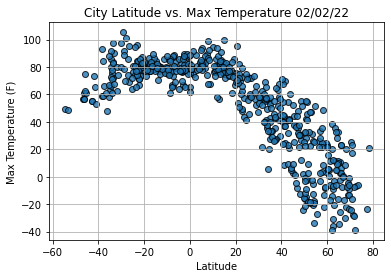

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter (lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure. 
plt.savefig("weather_data/Fig1.png")

#Show plot. 
plt.show()


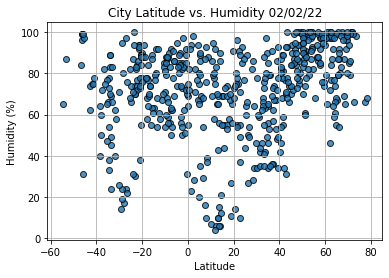

In [21]:
plt.scatter (lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure. 
plt.savefig("weather_data/Fig2.png")

#Show plot. 
plt.show()

## Plot Latitude vs. Cloudiness


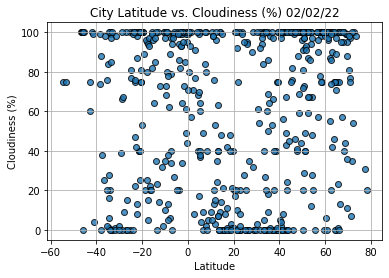

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

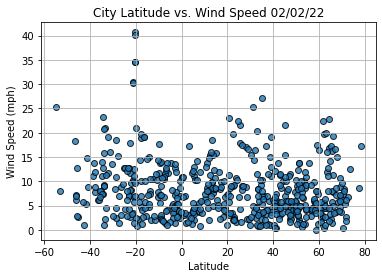

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()